In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
from scipy.stats import variation 
from scipy.stats import ttest_rel
import statistics as s
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm


In [34]:
df=pd.read_csv('SalaryData.csv')

In [35]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [36]:
df.shape

(40, 3)

In [37]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [38]:

df.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [39]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [41]:
print(df.nunique())

Education      3
Occupation     4
Salary        40
dtype: int64


In [42]:
print(df['Education'].value_counts())

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64


In [43]:
print(df['Occupation'].value_counts())

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64


In [44]:
df.Occupation = pd.Categorical(df.Occupation)

In [45]:
df.Education = pd.Categorical(df.Education)

## How ANOVA works?
Check sample sizes: equal number of observation in each group

Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group

Calculate Mean Square error (MSE) (SS error/df of residuals)

Calculate F value (MS of group/MSE)

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


## The Hypothesis for the One Way ANOVA are(Education):
## $H_0$: The mean salary of the employees are the same at 3 levels of Education

## $H_a$: For at least one level of educations,the mean salary is different.¶

    


In [46]:
formula = 'Salary ~  C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


We see that the corresponding p-value is greater than alpha (0.05). Thus, we  𝐟𝐚𝐢𝐥 𝐭𝐨 𝐫𝐞𝐣𝐞𝐜𝐭  the  𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬  ( 𝐻0 ).

## The Hypothesis for the One Way ANOVA are(Occupation):
## $H_0$: The mean salary of the employees are the same at 3 levels of Occupations

## $H_a$: For at least one level of Occupation,the mean salary is different.¶

In [47]:
formula = 'Salary ~  C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


We see that the corresponding p-value is greater than alpha (0.05). Thus, we  𝐟𝐚𝐢𝐥 𝐭𝐨 𝐫𝐞𝐣𝐞𝐜𝐭  the  𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬  ( 𝐻0 ).

# There are three sets of hypothesis with the two-way ANOVA.

## The null hypothesis for each of the sets are:

The population mean salary with respect to Education is equal. 

The population mean salary with respect to Occupation is equal. 

There is no interaction between the two factors.
## The alternate hypothesis for each of the sets are:
For at least one level of educations,the mean salary is different.

For at least one level of Occupation,the mean salary is different


There is interaction between the two factors.

In [67]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09   2.284576  9.648715e-02
C(Education)    2.0  9.695663e+10  4.847831e+10  29.510933  3.708479e-08
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


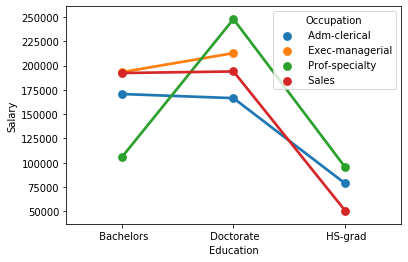

In [65]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation',ci=None);

### Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA

In [68]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


### Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'Weight_Gain' and 'Duration' suggests that the Null Hypothesis is rejected in this case.

## Key Result: P-Value
### In these results, you can conclude the following, based on the p-values and a significance level of 0.05:
